In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Load Dataset

In [416]:
dataset = pd.read_csv('data\weather_dataset.csv', index_col='date', parse_dates=True)

In [417]:
dataset.head()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2015-01-01,14.7,25.3,9.3,NaN,75.0,33.0
2015-01-02,13.9,23.5,7.5,NaN,75.8,37.0
2015-01-03,14.1,21.0,9.5,NaN,83.5,54.0
2015-01-04,16.5,18.8,14.6,NaN,88.3,83.0
2015-01-05,19.0,22.6,16.5,0.0,87.0,72.0


In [418]:
dataset.tail()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2020-12-27,20.3,24.8,17.3,NaN,83.0,67.0
2020-12-28,20.7,23.6,18.8,NaN,88.0,77.0
2020-12-29,21.4,25.8,19.9,NaN,86.0,74.0
2020-12-30,17.5,20.9,16.2,NaN,50.0,42.0
2020-12-31,13.6,19.0,12.1,NaN,57.0,41.0


# Data Preprocessing

In [419]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ttb     2192 non-null   float64
 1   Tx      2192 non-null   float64
 2   Tn      2192 non-null   float64
 3   R       988 non-null    float64
 4   Utb     2192 non-null   float64
 5   Un      2192 non-null   float64
dtypes: float64(6)
memory usage: 119.9 KB


### Chuyển cột mưa (R) về 0 với 1

In [420]:
dataset = dataset.fillna(-1)

In [421]:
#labling rain column
for i in range(len(dataset)):
    if  dataset['R'][i] == -1:
        dataset['R'][i] = 0
    else:
        dataset['R'][i] = 1
dataset.head()



,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2015-01-01,14.7,25.3,9.3,0.0,75.0,33.0
2015-01-02,13.9,23.5,7.5,0.0,75.8,37.0
2015-01-03,14.1,21.0,9.5,0.0,83.5,54.0
2015-01-04,16.5,18.8,14.6,0.0,88.3,83.0
2015-01-05,19.0,22.6,16.5,1.0,87.0,72.0


In [422]:
dataset.describe()

,Ttb,Tx,Tn,R,Utb,Un
count,2192.000000,2192.000000,2192.000000,2192.00000,2192.000000,2192.000000
mean,23.350228,28.020073,20.466834,0.45073,83.805246,67.428832
std,5.042623,5.702109,4.949226,0.49768,6.906062,13.725397
min,6.100000,8.000000,2.500000,0.00000,50.000000,23.000000
25%,19.600000,24.000000,17.100000,0.00000,80.000000,59.000000
50%,24.500000,29.000000,21.600000,0.00000,84.000000,67.000000
75%,27.500000,32.800000,24.600000,1.00000,89.000000,77.000000
max,31.500000,39.000000,28.200000,1.00000,99.000000,98.000000


In [423]:
#dataset.drop('R', axis=1, inplace=True)
#dataset.head()

### Scaling dataset

In [424]:
from sklearn.preprocessing import MinMaxScaler

In [425]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [426]:
len(dataset_scaled)

2192

# Splitting Dataset

In [427]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [428]:
rate = 0.2
X, y = dataset_scaled[:-1], dataset_scaled[1:]
pos_split = int(len(X)*(1 - rate))
X_train, X_test, y_train, y_test = X[:pos_split], X[pos_split:], y[:pos_split], y[pos_split:] 
X_train[0].shape

(6,)

In [429]:
from keras.models import Sequential
from keras.layers import Dense

In [430]:
n_features = 6
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(6,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=6, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                224       
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 6)                 102       
                                                                 
Total params: 854
Trainable params: 854
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.fit(x=X_train, y=y_train, epochs = 10, verbose =1)

Epoch 1/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0696
Epoch 2/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 3/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0536
Epoch 4/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0505
Epoch 5/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0483
Epoch 6/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 7/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 8/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 9/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 10/10
55/55 [==============================] - 0s 1ms/step - loss: 0.0433


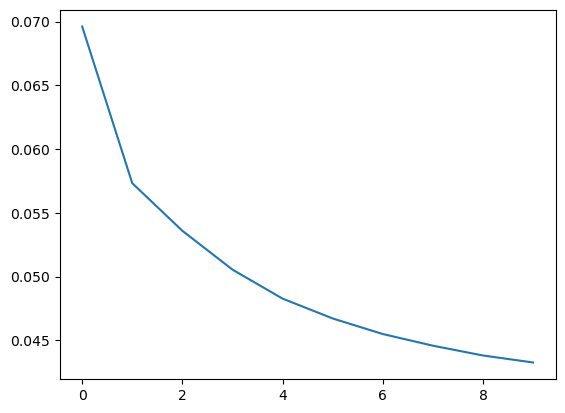

In [432]:
plt.plot(model.history.history['loss'])

# Test

In [433]:
y_predict = model.predict(X_test)
y_predict = y_predict


y_predict = scaler.inverse_transform(y_predict)
y_real = scaler.inverse_transform(y_test)


Ttb_pred, Tx_pred, Tn_pred, R_pred, Utb_pred, Un_pred = y_predict[1:,0], y_predict[1:,1], y_predict[1:,2], y_predict[1:,3], y_predict[1:,4], y_predict[1:,5]

Ttb_real, Tx_real, Tn_real, R_real, Utb_real, Un_real = y_real[:-1,0], y_real[:-1,1], y_real[:-1,2], y_real[:-1,3], y_real[:-1,4], y_real[:-1,5]

print(np.shape(Ttb_pred), np.shape(Tn_real))


14/14 [==============================] - 0s 1ms/step
(438,) (438,)


In [434]:
np.shape(y_predict)

(439, 6)

# Evaluating

### Ttb (Mean Temperature)

In [435]:
Ttb_MAE = np.array(tf.keras.metrics.mean_squared_error(Ttb_real, Ttb_pred))
Ttb_MAE

array(1.2947875, dtype=float32)

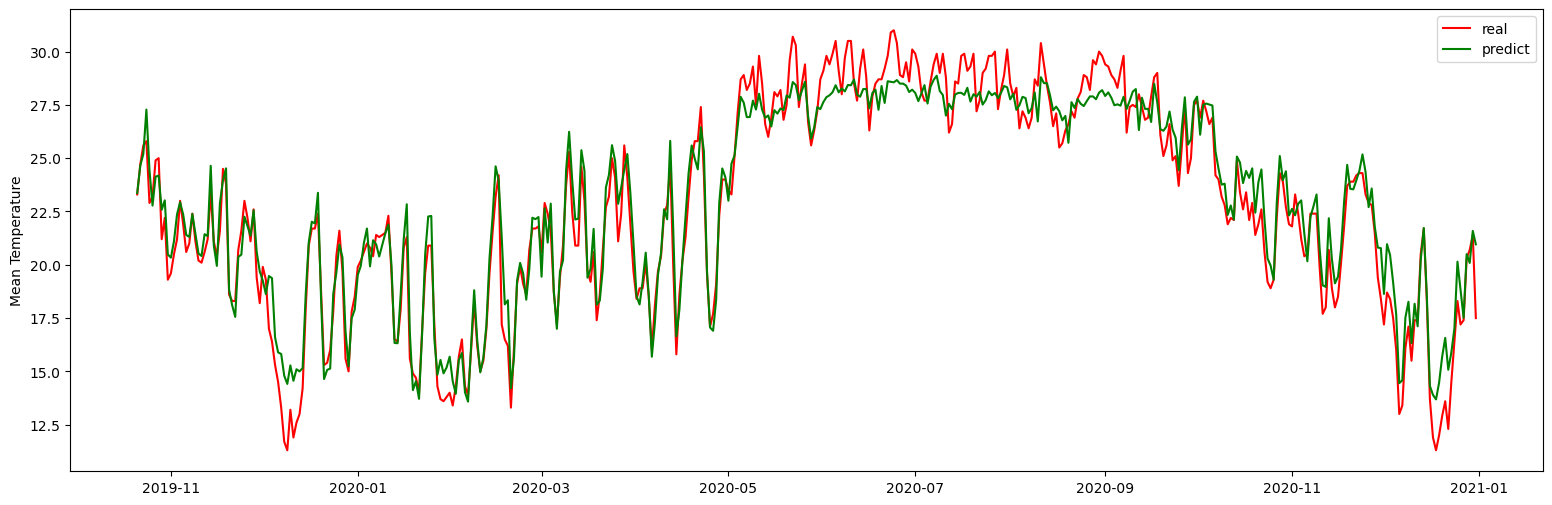

In [436]:
#Visualizing
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Ttb_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Ttb_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Mean Temperature');

### Tx (Max Temperature)

In [437]:
Tx_MAE = np.array(tf.keras.metrics.mean_squared_error(Tx_real, Tx_pred))
Tx_MAE

array(2.568702, dtype=float32)

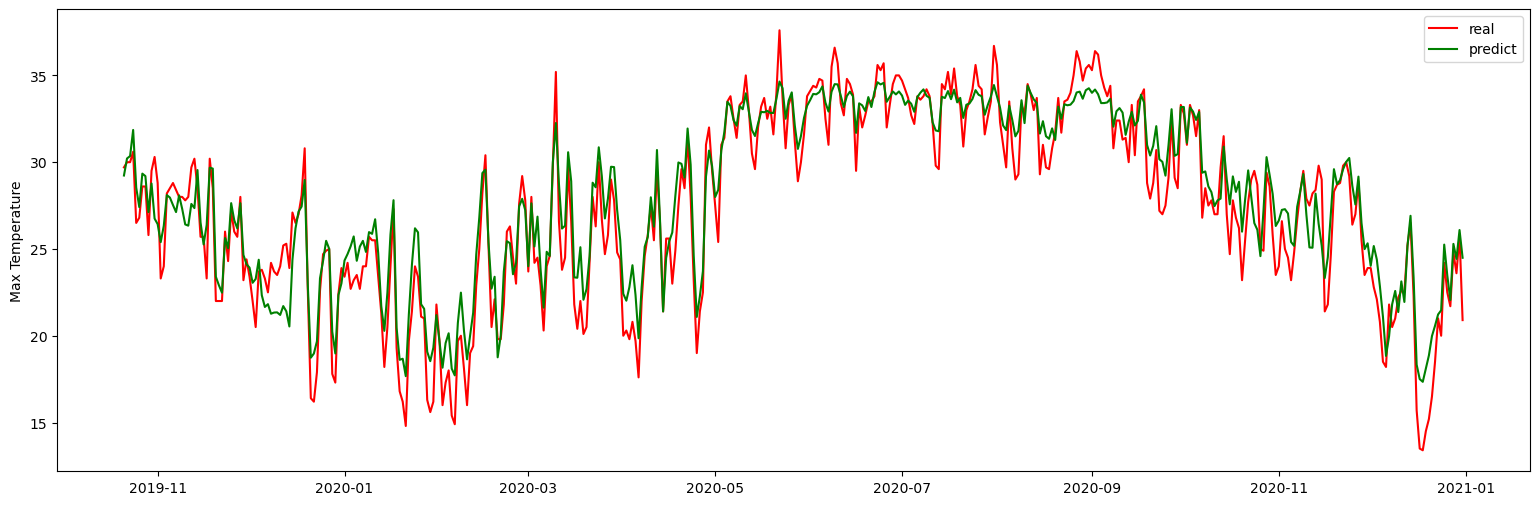

In [438]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Tx_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Tx_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Max Temperature');

### Tn (Min Temperature)

In [439]:
Tn_MAE = np.array(tf.keras.metrics.mean_squared_error(Tn_real, Tn_pred))
Tn_MAE

array(2.6301527, dtype=float32)

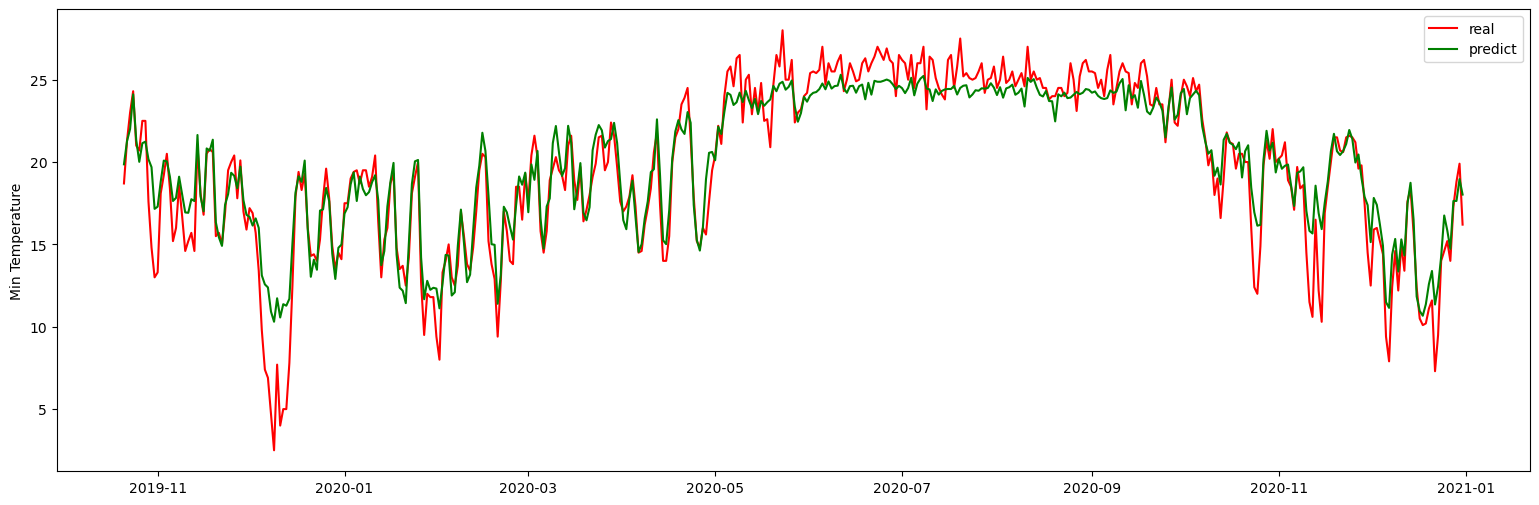

In [440]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Tn_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Tn_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Min Temperature');

### R (Rain)

In [441]:
#for i in range(len(R_pred)):
#    if R_pred[i] < 0.5:
#        R_pred[i] = 0
#    else:
#        R_pred[i] = 1
        
#np.shape(R)

In [442]:
BA = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
BA.update_state(R_real, R_pred)
R_Accuracy = BA.result().numpy()
R_Accuracy

0.9954338

### Utb (Mean Humidity)

In [443]:
Utb_MAE = np.array(tf.keras.metrics.mean_squared_error(Utb_real, Utb_pred))
Utb_MAE

array(26.8043, dtype=float32)

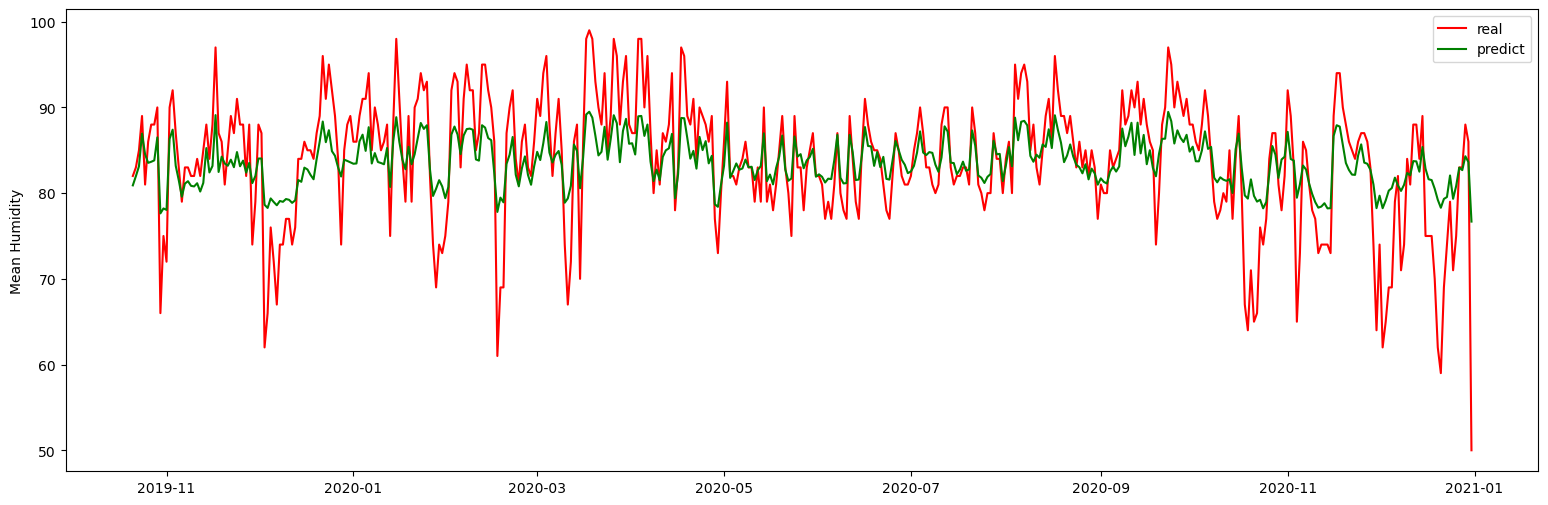

In [444]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Utb_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Utb_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Mean Humidity');

### Un (Min Humidity)

In [445]:
Un_MAE = np.array(tf.keras.metrics.mean_squared_error(Un_real, Un_pred))
Un_MAE

array(80.59281, dtype=float32)

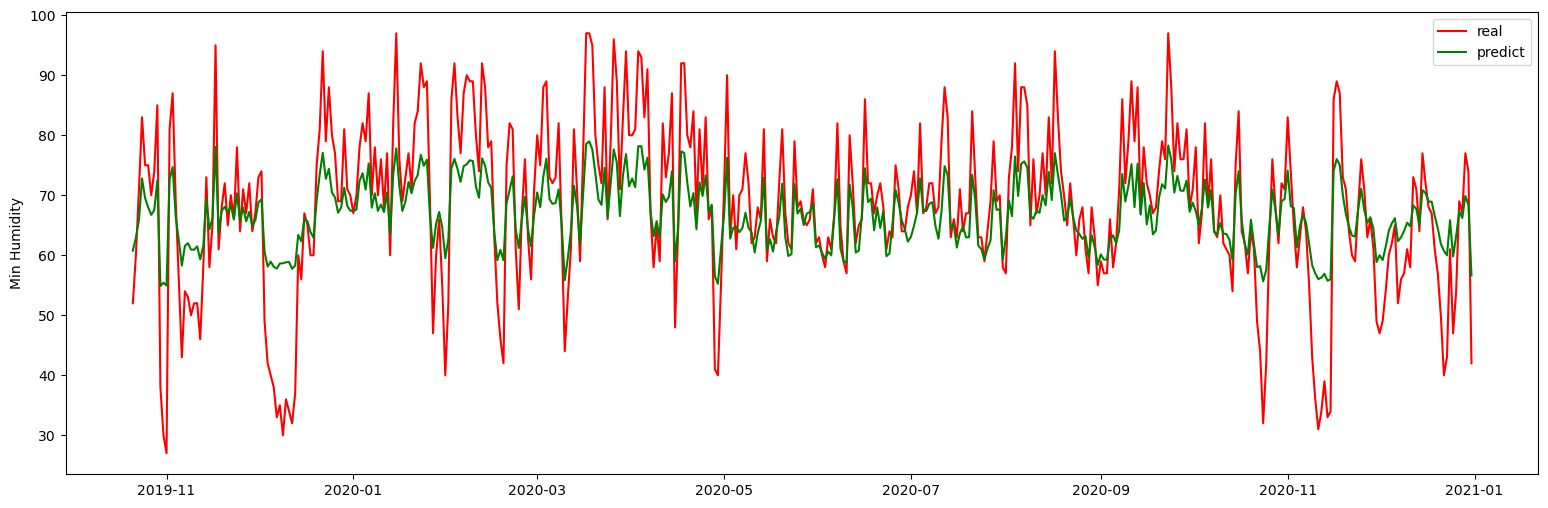

In [446]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Un_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Un_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Min Humidity');

## Conclusion

In [447]:
result = pd.DataFrame({
    'Predict' : ['Ttb (Nhiệt độ trung bình)', 'Tx (Nhiệt độ cao nhất)', 'Tn (Nhiệt độ thấp nhất)', 'Utb (Độ ẩm trung bình)', 'Un (Độ ẩm thấp nhất)'],
    'MAE' : [Ttb_MAE, Tx_MAE, Tn_MAE, Utb_MAE, Un_MAE]
})

result = result.sort_values(by='MAE', ascending=False)
result = result.set_index('Predict')
result

,MAE
Predict,
Un (Độ ẩm thấp nhất),80.59281
Utb (Độ ẩm trung bình),26.8043
Tn (Nhiệt độ thấp nhất),2.6301527
Tx (Nhiệt độ cao nhất),2.568702
Ttb (Nhiệt độ trung bình),1.2947875


In [448]:
print(f'Độ chính xác khi dự đoán có mưa hay không {R_Accuracy}')

Độ chính xác khi dự đoán có mưa hay không 0.9954338073730469


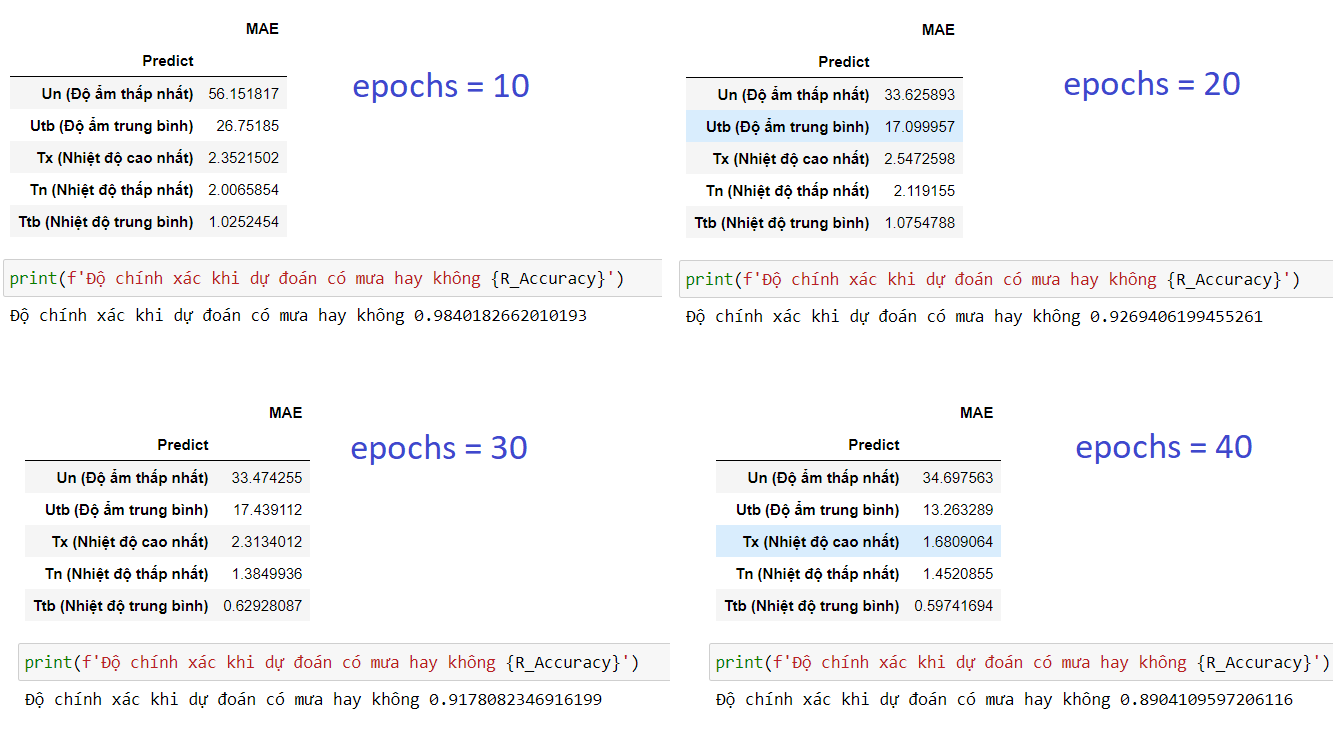

`Hmm. Nhìn vào hình thì chúng ta không thể tăng đồng thời tất cả các thuộc tính => tách ra một module riêng để đoán mưa
Nên tận dụng dữ liệu dạng số thực => hồi qui hoặc mạng nơ ron với 1 đầu ra đều được :v => T sẽ làm mạng nơ ron ở file onlỷain.jpynb nhoé`